In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('conn.csv')

In [4]:
data.tail()

,1556436597,Cdddkw1Y4af6iWhaCl,192.168.1.193,49179,192.168.1.195,5357,tcp,http,0.002501,954,...,SF,-,-.1,0,ShADadfF,6,1206,5,2582,-.2
607151,1556531099,CEIBzz42U6AEReLdVh,192.168.1.1,51587,192.168.1.195,49948,udp,-,-,-,...,S0,-,-,0,D,1,310,0,0,-
607152,1556531106,CuEuzX3Z9di2jkKjF4,192.168.1.79,33989,192.168.1.255,15600,udp,-,-,-,...,S0,-,-,0,D,1,315,0,0,-
607153,1556531127,C8YiwL27KQ006yLSX5,192.168.1.1,138,192.168.1.255,138,udp,-,0.002531,426,...,S0,-,-,0,D,2,482,0,0,-
607154,1556531106,CNCJ4B43H8MOfljXAg,192.168.1.79,43382,192.168.1.255,15600,udp,-,-,-,...,S0,-,-,0,D,1,66,0,0,-
607155,1556531096,CmR6IF3Ee5Rk5Nadsh,192.168.1.1,56504,192.168.1.195,49948,udp,-,4.140755,5116,...,S0,-,-,0,D,16,5564,0,0,-


In [5]:
data.columns = ['time','uid', 'src_ip','src_port','dst_ip','dst_port','protocol','service', 'duration',	'src_bytes','dst_bytes','conn_state','local_orig','local_resp','missed_bytes','history','orig_pkts','src_seq','dst_seq','dst_pkts','target']

In [6]:
pd.crosstab(data.protocol,data.service)

service,-,dce_rpc,dhcp,dns,gssapi,http,smb,"smb,gssapi",ssl
protocol,,,,,,,,,
icmp,994,0,0,0,0,0,0,0,0
tcp,549945,76,0,8,100,15369,108,18,490
udp,18786,0,1,21261,0,0,0,0,0


In [6]:
pd.crosstab(data.flag,data.protocol_type)

protocol_type,icmp,tcp,udp
flag,,,
OTH,0,5,0
REJ,0,2216,0
RSTO,0,304,0
RSTOS0,0,21,0
RSTR,0,497,0
S0,0,7009,0
S1,0,88,0
S2,0,21,0
S3,0,15,0


In [7]:
set(data.service)

{'-', 'dce_rpc', 'dhcp', 'dns', 'gssapi', 'http', 'smb', 'smb,gssapi', 'ssl'}

In [9]:
set(data.protocol)

{'icmp', 'tcp', 'udp'}

In [10]:
data.shape

(607156, 21)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607156 entries, 0 to 607155
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time          607156 non-null  int64 
 1   uid           607156 non-null  object
 2   src_ip        607156 non-null  object
 3   src_port      607156 non-null  int64 
 4   dst_ip        607156 non-null  object
 5   dst_port      607156 non-null  int64 
 6   protocol      607156 non-null  object
 7   service       607156 non-null  object
 8   duration      607156 non-null  object
 9   src_bytes     607156 non-null  object
 10  dst_bytes     607156 non-null  object
 11  conn_state    607156 non-null  object
 12  local_orig    607156 non-null  object
 13  local_resp    607156 non-null  object
 14  missed_bytes  607156 non-null  int64 
 15  history       607156 non-null  object
 16  orig_pkts     607156 non-null  int64 
 17  src_seq       607156 non-null  int64 
 18  dst_seq       607156 non

In [12]:
data.columns


Index(['time', 'uid', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'protocol',
       'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state',
       'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts',
       'src_seq', 'dst_seq', 'dst_pkts', 'target'],
      dtype='object')

In [12]:
data.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type']

In [13]:
set(data.conn_state)

{'OTH',
 'REJ',
 'RSTO',
 'RSTOS0',
 'RSTR',
 'RSTRH',
 'S0',
 'S1',
 'S3',
 'SF',
 'SH',
 'SHR'}

In [14]:
data.conn_state.value_counts()

REJ       507846
OTH        35443
SF         29445
S0         28175
SH          3241
SHR         1395
RSTRH        926
RSTR         286
RSTOS0       259
RSTO         113
S1            26
S3             1
Name: conn_state, dtype: int64

In [15]:
data.conn_state.value_counts()/data.shape[0]

REJ       0.836434
OTH       0.058375
SF        0.048497
S0        0.046405
SH        0.005338
SHR       0.002298
RSTRH     0.001525
RSTR      0.000471
RSTOS0    0.000427
RSTO      0.000186
S1        0.000043
S3        0.000002
Name: conn_state, dtype: float64

In [16]:
set(data.service)

{'-', 'dce_rpc', 'dhcp', 'dns', 'gssapi', 'http', 'smb', 'smb,gssapi', 'ssl'}

In [17]:
data.service.value_counts()

-             569725
dns            21269
http           15369
ssl              490
smb              108
gssapi           100
dce_rpc           76
smb,gssapi        18
dhcp               1
Name: service, dtype: int64

In [18]:
data.service.dropna()

0         http
1         http
2         http
3         http
4         http
          ... 
607151       -
607152       -
607153       -
607154       -
607155       -
Name: service, Length: 607156, dtype: object

In [19]:
len(set(data.service))

9

In [20]:
data.conn_state.value_counts()/data.shape[0]

REJ       0.836434
OTH       0.058375
SF        0.048497
S0        0.046405
SH        0.005338
SHR       0.002298
RSTRH     0.001525
RSTR      0.000471
RSTOS0    0.000427
RSTO      0.000186
S1        0.000043
S3        0.000002
Name: conn_state, dtype: float64

In [20]:
# Binary ML classification
# Multiclass ML classification
# Multilabel ML Classification

In [21]:
data.head()

,time,uid,src_ip,src_port,dst_ip,dst_port,protocol,service,duration,src_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,src_seq,dst_seq,dst_pkts,target
0,1556436597,CCyxHH24T7sLnN1fCk,192.168.1.195,57513,192.168.1.79,9197,tcp,http,0.257427,169,...,SF,-,-,0,ShADadfF,6,421,7,3770,-
1,1556436597,CiWJUk2jNItGiPncfh,192.168.1.195,57514,192.168.1.79,7678,tcp,http,0.06518,175,...,SF,-,-,0,ShADadfF,5,387,6,1945,-
2,1556436597,CC5Akyp2Mr3PPFuF2,192.168.1.195,57515,192.168.1.79,9197,tcp,http,0.021509,188,...,SF,-,-,0,ShADadfF,6,440,8,3810,-
3,1556436597,C4Tzrb2O9VTEKTBJ33,192.168.1.195,57516,192.168.1.79,7678,tcp,http,0.025243,194,...,SF,-,-,0,ShADadfF,5,406,6,1945,-
4,1556436597,CgT0Ih3pNRKONo5T27,192.168.1.195,57517,192.168.1.79,9197,tcp,http,0.041554,132,...,SF,-,-,0,ShADadfF,5,344,7,2062,-


In [22]:
set(data.service)

{'-', 'dce_rpc', 'dhcp', 'dns', 'gssapi', 'http', 'smb', 'smb,gssapi', 'ssl'}

In [23]:
#Attacks fall into four main categories:

#DOS: denial-of-service, e.g. syn flood;
#R2L: unauthorized access from a remote machine, e.g. guessing password;
#U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks
#probing: surveillance and other probing, e.g., port scanning


# http://kdd.ics.uci.edu/databases/kddcup99/task.html

In [23]:
data.conn_state.value_counts()/data.shape[0]

REJ       0.836434
OTH       0.058375
SF        0.048497
S0        0.046405
SH        0.005338
SHR       0.002298
RSTRH     0.001525
RSTR      0.000471
RSTOS0    0.000427
RSTO      0.000186
S1        0.000043
S3        0.000002
Name: conn_state, dtype: float64

In [24]:
# DISTRIBUTION OF TARGET CLASS
data.conn_state.value_counts()

REJ       507846
OTH        35443
SF         29445
S0         28175
SH          3241
SHR         1395
RSTRH        926
RSTR         286
RSTOS0       259
RSTO         113
S1            26
S3             1
Name: conn_state, dtype: int64

In [25]:
data.head()

,time,uid,src_ip,src_port,dst_ip,dst_port,protocol,service,duration,src_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,src_seq,dst_seq,dst_pkts,target
0,1556436597,CCyxHH24T7sLnN1fCk,192.168.1.195,57513,192.168.1.79,9197,tcp,http,0.257427,169,...,SF,-,-,0,ShADadfF,6,421,7,3770,-
1,1556436597,CiWJUk2jNItGiPncfh,192.168.1.195,57514,192.168.1.79,7678,tcp,http,0.06518,175,...,SF,-,-,0,ShADadfF,5,387,6,1945,-
2,1556436597,CC5Akyp2Mr3PPFuF2,192.168.1.195,57515,192.168.1.79,9197,tcp,http,0.021509,188,...,SF,-,-,0,ShADadfF,6,440,8,3810,-
3,1556436597,C4Tzrb2O9VTEKTBJ33,192.168.1.195,57516,192.168.1.79,7678,tcp,http,0.025243,194,...,SF,-,-,0,ShADadfF,5,406,6,1945,-
4,1556436597,CgT0Ih3pNRKONo5T27,192.168.1.195,57517,192.168.1.79,9197,tcp,http,0.041554,132,...,SF,-,-,0,ShADadfF,5,344,7,2062,-


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607156 entries, 0 to 607155
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time          607156 non-null  int64 
 1   uid           607156 non-null  object
 2   src_ip        607156 non-null  object
 3   src_port      607156 non-null  int64 
 4   dst_ip        607156 non-null  object
 5   dst_port      607156 non-null  int64 
 6   protocol      607156 non-null  object
 7   service       607156 non-null  object
 8   duration      607156 non-null  object
 9   src_bytes     607156 non-null  object
 10  dst_bytes     607156 non-null  object
 11  conn_state    607156 non-null  object
 12  local_orig    607156 non-null  object
 13  local_resp    607156 non-null  object
 14  missed_bytes  607156 non-null  int64 
 15  history       607156 non-null  object
 16  orig_pkts     607156 non-null  int64 
 17  src_seq       607156 non-null  int64 
 18  dst_seq       607156 non

In [28]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
set(data.protocol)

{'icmp', 'tcp', 'udp'}

In [28]:
data.protocol.value_counts()/data.shape[0]

tcp     0.932403
udp     0.065960
icmp    0.001637
Name: protocol, dtype: float64

In [29]:
set(data.service)

{'-', 'dce_rpc', 'dhcp', 'dns', 'gssapi', 'http', 'smb', 'smb,gssapi', 'ssl'}

In [30]:
data.service.value_counts()/data.shape[0]

-             0.938350
dns           0.035031
http          0.025313
ssl           0.000807
smb           0.000178
gssapi        0.000165
dce_rpc       0.000125
smb,gssapi    0.000030
dhcp          0.000002
Name: service, dtype: float64

In [31]:
len(set(data.service))

9

In [32]:
#transform the string columns to the numeric al column
# dummy variable creation
pd.get_dummies(data.service,prefix='service')

,service_-,service_dce_rpc,service_dhcp,service_dns,service_gssapi,service_http,service_smb,"service_smb,gssapi",service_ssl
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
607151,1,0,0,0,0,0,0,0,0
607152,1,0,0,0,0,0,0,0,0
607153,1,0,0,0,0,0,0,0,0
607154,1,0,0,0,0,0,0,0,0


In [33]:
pd.get_dummies(data.protocol,prefix='protocol')

,protocol_icmp,protocol_tcp,protocol_udp
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
607151,0,0,1
607152,0,0,1
607153,0,0,1
607154,0,0,1


In [34]:
pd.get_dummies(data.conn_state,prefix='flag')

,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_RSTRH,flag_S0,flag_S1,flag_S3,flag_SF,flag_SH,flag_SHR
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
607151,0,0,0,0,0,0,1,0,0,0,0,0
607152,0,0,0,0,0,0,1,0,0,0,0,0
607153,0,0,0,0,0,0,1,0,0,0,0,0
607154,0,0,0,0,0,0,1,0,0,0,0,0


In [36]:
serv_dum = pd.get_dummies(data.service,prefix='service')
protcol = pd.get_dummies(data.protocol,prefix='protocol')
flag = pd.get_dummies(data.conn_state,prefix='flag')

In [38]:
set(data.conn_state)

{'OTH',
 'REJ',
 'RSTO',
 'RSTOS0',
 'RSTR',
 'RSTRH',
 'S0',
 'S1',
 'S3',
 'SF',
 'SH',
 'SHR'}

In [39]:
data.conn_state.value_counts()/data.shape[0]

REJ       0.836434
OTH       0.058375
SF        0.048497
S0        0.046405
SH        0.005338
SHR       0.002298
RSTRH     0.001525
RSTR      0.000471
RSTOS0    0.000427
RSTO      0.000186
S1        0.000043
S3        0.000002
Name: conn_state, dtype: float64

In [40]:
len(set(data.flag))

11

In [41]:
data.flag.value_counts()

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64

In [42]:
# feature engineering

In [43]:
# dummy variable creation for all the string columns

In [40]:
#del data["attack_type"]

del data['protocol']

del data['service']

del data["conn_state"]

In [41]:
data.shape

(607156, 18)

In [42]:
serv_dum.shape

(607156, 9)

In [43]:
protcol.shape

(607156, 3)

In [44]:
flag.shape

(607156, 12)

In [45]:
full_data = pd.concat([data,serv_dum,protcol,flag],axis=1)

In [59]:
list(full_data.columns)

['time',
 'uid',
 'src_ip',
 'src_port',
 'dst_ip',
 'dst_port',
 'duration',
 'src_bytes',
 'dst_bytes',
 'local_orig',
 'local_resp',
 'missed_bytes',
 'history',
 'orig_pkts',
 'src_seq',
 'dst_seq',
 'dst_pkts',
 'target',
 'service_-',
 'service_dce_rpc',
 'service_dhcp',
 'service_dns',
 'service_gssapi',
 'service_http',
 'service_smb',
 'service_smb,gssapi',
 'service_ssl',
 'protocol_icmp',
 'protocol_tcp',
 'protocol_udp',
 'flag_OTH',
 'flag_REJ',
 'flag_RSTO',
 'flag_RSTOS0',
 'flag_RSTR',
 'flag_RSTRH',
 'flag_S0',
 'flag_S1',
 'flag_S3',
 'flag_SF',
 'flag_SH',
 'flag_SHR']

In [57]:
full_data.shape

(607156, 42)

In [64]:
data.flag()

AttributeError: 'DataFrame' object has no attribute 'flag'

In [58]:
y = full_data.pop('conn_state')

KeyError: 'conn_state'

In [51]:
x = full_data

In [52]:
y

NameError: name 'y' is not defined

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
xtrain,xtest,ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=707)

NameError: name 'y' is not defined

In [57]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((17634, 118), (17634,), (7558, 118), (7558,))

In [58]:
ytrain

3273      normal
25042     normal
22932    anomaly
425       normal
17667    anomaly
          ...   
11981     normal
5241      normal
18275    anomaly
19615     normal
249       normal
Name: attack_type, Length: 17634, dtype: object

In [59]:
xtrain.index

Int64Index([ 3273, 25042, 22932,   425, 17667, 13717,   187, 13859, 24042,
              564,
            ...
             4675,  5450,  5258, 18477, 19898, 11981,  5241, 18275, 19615,
              249],
           dtype='int64', length=17634)

In [60]:
x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
25188,0,334,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
25189,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [61]:
# Model Creation/training step

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain,xtest,ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=707)

In [64]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((17634, 118), (17634,), (7558, 118), (7558,))

In [65]:
ytrain

3273      normal
25042     normal
22932    anomaly
425       normal
17667    anomaly
          ...   
11981     normal
5241      normal
18275    anomaly
19615     normal
249       normal
Name: attack_type, Length: 17634, dtype: object

In [66]:
xtrain.index #run 1

Int64Index([ 3273, 25042, 22932,   425, 17667, 13717,   187, 13859, 24042,
              564,
            ...
             4675,  5450,  5258, 18477, 19898, 11981,  5241, 18275, 19615,
              249],
           dtype='int64', length=17634)

In [67]:
xtrain.index #run 2

Int64Index([ 3273, 25042, 22932,   425, 17667, 13717,   187, 13859, 24042,
              564,
            ...
             4675,  5450,  5258, 18477, 19898, 11981,  5241, 18275, 19615,
              249],
           dtype='int64', length=17634)

In [68]:
xtest.index

Int64Index([ 2335,   831, 13807,  4780,  3862, 25055,  5279,  4590,  7521,
             7515,
            ...
             2323, 22217, 20743,  2009, 22406,  6421, 21898, 11148,  6520,
            12986],
           dtype='int64', length=7558)

In [69]:
from sklearn.cluster import AgglomerativeClustering

xtrain,xtest,ytrain, ytest = train_test_split(x,y,test_size=0.95,random_state=707)
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(xtrain)
xtrain.shape

clustering

clustering.labels_

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [70]:
#import numpy as np
#plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
#plot_dendrogram(clustering, truncate_mode='level', p=3)
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.show()

In [71]:
# Model training

In [72]:
# the target column is a categorical column
# a supervised model and it should be a classification

In [73]:
# Logistic regression

# Decision tree model
# Random forest model

# SVM

# NB
# KNN

# GBM
# XGBoost Model

# Keras: Neural Network Model
# TF: Cnn, Rnn models

In [74]:
# Gradient Descent Algorithm

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model2 = LogisticRegression()

In [77]:
model2.fit(xtrain,ytrain)

/home/rajeev/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
import numpy as np
np.round(model2.coef_,3)

array([[-0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   , -0.015,  0.002, -0.   , -0.   , -0.   ,
        -0.   ,  0.   ,  0.   , -0.   , -0.002,  0.017,  0.   , -0.   ,
        -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,
        -0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
        -0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
         0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,
        -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
        -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,
        -0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   , -0.   ,
        -0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,
        -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   ,
        -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , 

In [79]:
model2.score(xtrain,ytrain)

0.8783599863899285

In [80]:
model2.score(xtest,ytest)

0.8740407515215666

In [81]:
# predictions on the test set to understand how good our model is?

In [82]:
pred = model2.predict(xtest)

In [83]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [84]:
confusion_matrix(ytest,pred)

array([[3021,  554],
       [ 398, 3585]])

In [85]:
round(accuracy_score(ytest,pred),2)

0.87

In [86]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

     anomaly       0.88      0.85      0.86      3575
      normal       0.87      0.90      0.88      3983

    accuracy                           0.87      7558
   macro avg       0.87      0.87      0.87      7558
weighted avg       0.87      0.87      0.87      7558



In [87]:
model_para = np.round(model2.coef_,3)

In [88]:
temp = pd.DataFrame()

In [89]:
temp

""


In [90]:
temp['variables'] = pd.Series(xtrain.columns)

In [91]:
model_para.flatten()

array([-0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.015,  0.002, -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   , -0.   , -0.002,  0.017,  0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,
       -0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
        0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,
       -0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   , -0.   ,
       -0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,
       -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
      

In [92]:
temp['coef'] = pd.Series(model_para.flatten())

In [93]:
temp

,variables,coef
0,duration,-0.0
1,src_bytes,-0.0
2,dst_bytes,-0.0
3,land,-0.0
4,wrong_fragment,-0.0
...,...,...
113,flag_S1,0.0
114,flag_S2,-0.0
115,flag_S3,0.0
116,flag_SF,0.0


In [94]:
# filter cofficient
temp[temp.coef != 0.000]

,variables,coef
19,count,-0.015
20,srv_count,0.002
28,dst_host_count,-0.002
29,dst_host_srv_count,0.017


In [95]:
data['count'].describe()

count    25192.000000
mean        84.591180
std        114.673451
min          1.000000
25%          2.000000
50%         14.000000
75%        144.000000
max        511.000000
Name: count, dtype: float64

In [96]:
#temp.to_csv('output.csv')

In [97]:
# https://www.researchgate.net/publication/321906131_A_Review_on_Cyber_Security_Datasets_for_Machine_Learning_Algorithms

In [98]:
# https://datahub.io/machine-learning/kddcup99#readme

In [99]:
# Deterministic Model
# Rule based model
# extract the importance of features that are responsible for attack type
# 

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
model3 = DecisionTreeClassifier()

In [102]:
print(DecisionTreeClassifier())

DecisionTreeClassifier()


In [103]:
model3

DecisionTreeClassifier()

In [104]:
model3.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [105]:
model3.score(xtrain,ytrain)

1.0

In [106]:
model3.score(xtest,ytest)

0.9958983858163535

In [107]:
pred_tree = model3.predict(xtest)

In [108]:
confusion_matrix(ytest,pred_tree)

array([[3562,   13],
       [  18, 3965]])

In [109]:
print(classification_report(ytest,pred_tree))

              precision    recall  f1-score   support

     anomaly       0.99      1.00      1.00      3575
      normal       1.00      1.00      1.00      3983

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [110]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

     anomaly       0.88      0.85      0.86      3575
      normal       0.87      0.90      0.88      3983

    accuracy                           0.87      7558
   macro avg       0.87      0.87      0.87      7558
weighted avg       0.87      0.87      0.87      7558



In [111]:
np.round(model3.feature_importances_,2)

array([0.  , 0.74, 0.02, 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.  , 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [112]:
temp = pd.DataFrame()

temp['feat_imp'] = pd.Series(np.round(model3.feature_importances_,2))

temp['variables'] = pd.Series(xtrain.columns)

temp.to_csv('output.csv')

In [113]:
temp[temp.feat_imp != 0.00]

,feat_imp,variables
1,0.74,src_bytes
2,0.02,dst_bytes
6,0.02,hot
8,0.01,logged_in
30,0.03,dst_host_same_srv_rate
52,0.07,service_ecr_i
57,0.01,service_ftp_data
60,0.06,service_http


In [114]:
data.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,0,0,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,0,0,0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,0,0,0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,0,0,0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


<AxesSubplot:xlabel='src_bytes', ylabel='Density'>

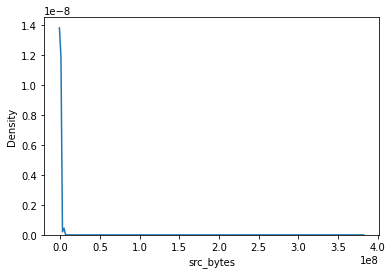

In [115]:
import seaborn as sns
sns.kdeplot(data.src_bytes)

In [116]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
from sklearn.tree import export_graphviz, plot_tree

In [118]:
#pip install pydotplus

TypeError: unhashable type: 'list'

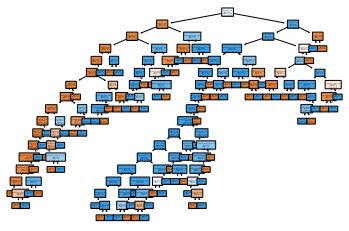

In [124]:
dot_data = tree.plot_tree(model3, 
                                #out_file=None, 
                                filled=True, 
                                rounded=True,
                                feature_names=list(xtrain.columns),  
                                class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [ ]:
import os
os.getcwd()

'/home/rajeev/PythonCode/RU ML LAB'

In [ ]:
data.to_csv('master_data.csv')

In [ ]:
# Entropy, Gini Index

In [ ]:
data[(data['count'] > 64.5) & (data['diff_srv_rate'] > 0.23)]['attack_type'].value_counts()

anomaly    446
Name: attack_type, dtype: int64

In [ ]:
data.shape

(494020, 39)

In [ ]:
xtrain[(xtrain['count'] > 64.5) & (xtrain['diff_srv_rate'] > 0.23)]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
91628,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
149780,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
140943,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
149586,5,6,151,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
141184,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91967,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
149790,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
140980,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
140604,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Model Tells us

# if count > 64.5 and diff_serv_rate > 0.23 then R2L: unauthorized access from a remote machine,e.g.guessing password

In [ ]:
data.index

RangeIndex(start=0, stop=25192, step=1)

In [ ]:
# GRID SEARCH
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score

In [ ]:
model3

DecisionTreeClassifier()

In [ ]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score
from sklearn.metrics import make_scorer
cv_set = ShuffleSplit(n_splits=10,test_size=0.30,random_state=1234)
cv_sets = cv_set.get_n_splits(xtrain)
cv_sets

10

In [ ]:
cv_set.get_n_splits(xtrain)

10

In [ ]:
# create a function to perform grid search with cross validation and returns the accuracy values
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.best_params_
    return top_params

In [ ]:
param_grid = {"criterion": ["gini","entropy"],
             "max_depth": [3,5,7],
              "min_samples_split":[30,35,40]
             }

In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter

In [ ]:
2*3*3*10

180

In [ ]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [ ]:
GridSearch_BestParam(xtrain,ytrain,clf,param_grid,10)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 30}

In [ ]:
model5 = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=40)
model5.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=40)

In [ ]:
model5 = clf.fit(xtrain,ytrain)

In [ ]:
dot_data = tree.export_graphviz(model5, 
                                out_file=None, 
                                filled=True, 
                                rounded=True,
                                feature_names=list(xtrain.columns),  
                                class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

InvocationException: GraphViz's executables not found

In [ ]:
model5.decision_path(xtrain)

<17634x179 sparse matrix of type '<class 'numpy.int64'>'
	with 217369 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.tree import export_text

In [ ]:
tree_rules = export_text(model5, feature_names=list(xtrain.columns))
print(tree_rules)

|--- src_bytes <= 28.50
|   |--- service_http <= 0.50
|   |   |--- dst_bytes <= 2.50
|   |   |   |--- logged_in <= 0.50
|   |   |   |   |--- flag_S1 <= 0.50
|   |   |   |   |   |--- service_smtp <= 0.50
|   |   |   |   |   |   |--- count <= 3.50
|   |   |   |   |   |   |   |--- service_ftp_data <= 0.50
|   |   |   |   |   |   |   |   |--- service_finger <= 0.50
|   |   |   |   |   |   |   |   |   |--- service_auth <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- flag_RSTO <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- flag_RSTO >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: normal
|   |   |   |   |   |   |   |   |   |--- service_auth >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: normal
|   |   |   |   |   |   |   |   |--- service_finger >  0.50
|   |   |   |   |   |   |   |   |   |--- src_bytes <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- dst_host_srv_rerror_rat

In [ ]:
pd.DataFrame(model5.predict_proba(xtest)).to_csv('prob_score.csv')

In [ ]:
print(set(ytest))

{'anomaly', 'normal'}


In [ ]:
ytest

2335     anomaly
831       normal
13807     normal
4780      normal
3862      normal
          ...   
6421      normal
21898    anomaly
11148     normal
6520      normal
12986     normal
Name: attack_type, Length: 7558, dtype: object

In [ ]:
# Model Overfitting:

# Is a scenario where the training accuracy is more in comparison to the test accuracy

# If the difference between training accuracy and test accuracy is more than 2% then there is a possibility of overfit


In [ ]:
param_grid = {"criterion": ["gini","entropy"],
             "max_depth": [3,5,7],
              "min_samples_split":[30,35,40]
             }
GridSearch_BestParam(xtrain,ytrain,clf,param_grid,10)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 35}

In [ ]:
param_grid = {"criterion": ["gini","entropy"],
             "max_depth": [10,12,15],
              "min_samples_split":[40,35,45,50]
             }
result2 = GridSearch_BestParam(xtrain,ytrain,clf,param_grid,10)
print(result2)

{'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 35}


In [ ]:
final_model = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=12,
                                    min_samples_split=35)

In [ ]:
final_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=35)

In [ ]:
final_model.score(xtrain,ytrain)

0.9969377339231031

In [ ]:
final_model.score(xtest,ytest)

0.9936491135220958

In [ ]:
# Quiz

In [ ]:
# Random Forest Algorithm

In [ ]:
(np.round(final_model.feature_importances_,3) )

array([0.007, 0.644, 0.011, 0.   , 0.   , 0.   , 0.039, 0.   , 0.003,
       0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.083, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.   , 0.003, 0.018, 0.001, 0.037, 0.   , 0.008, 0.   ,
       0.004, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.085, 0.   ,
       0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.039, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
       0.   , 0.   , 0.   , 0.012, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [ ]:
xtrain.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=118)

In [ ]:
# smart phones
# iphone vs android

# 5: 
#1. android
#2. android
#3. iphone
#4. android
#5. andriod

#100.
# voting 4/1 for andriod

In [ ]:
xtrain.shape

(345814, 118)

In [ ]:
# Dt1 = sample 118, select a good sample, SQRT(118)
np.sqrt(118), # generate pred 
# Dt2 = sample 118, select 11 features
# Dt100 = 

# dt500

(10.862780491200215,)

In [ ]:
# voting rule: 500, dos, url2, ....

In [ ]:
# 50 features
# 100 trees

# RF wroks when the total feature size increases beyond 100

In [ ]:
np.sqrt(50)

7.0710678118654755

In [ ]:
#t1 = 7 
#t2 = 7
#t3 = 7

# what should be the number of tress ?
# what is the optimal number of features?

In [ ]:
# 16
# 100
# 8 unique tree- 2 features for a single tree ((1,2),(3,4),(5,6),(7,8),(9,10),(11,12),(13,14),(15,16))
# 8 unique tree- 2 features for a single tree ((1,2),(2,3),(2,4),(7,8),(9,10),(11,12),(2,1),(15,16))

In [ ]:
# 92 duplicate trees

In [ ]:
print(list(range(0,118)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


In [ ]:
# 25 features, 1 DT
# 4 unique trees, 1st tree and 5th tree they have 8 featrues common
import random
print(sorted(random.sample(list(range(0,16)), 4)))

[1, 4, 8, 9]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[4, 10, 12, 15]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[3, 5, 9, 10]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[2, 5, 9, 11]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[2, 12, 14, 15]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[7, 9, 13, 15]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[1, 9, 10, 11]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[1, 4, 13, 14]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[3, 4, 5, 11]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[4, 8, 12, 14]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[5, 6, 10, 14]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[2, 3, 5, 13]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[1, 5, 12, 14]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[3, 4, 7, 8]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[10, 11, 13, 14]


In [ ]:
print(sorted(random.sample(list(range(0,16)), 4)))

[0, 6, 14, 15]


In [ ]:
(16*15*14*13)/(4*3*2*1)

1820.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
rf.score(xtrain,ytrain)

0.9999971082720769

In [ ]:
rf.score(xtest,ytest)

0.9997908316802289

In [ ]:
np.round(rf.feature_importances_,3)

array([0.01 , 0.029, 0.114, 0.   , 0.003, 0.   , 0.006, 0.   , 0.077,
       0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.155, 0.077, 0.01 , 0.006, 0.005, 0.005, 0.032, 0.012,
       0.01 , 0.056, 0.022, 0.034, 0.018, 0.028, 0.043, 0.013, 0.005,
       0.008, 0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.004, 0.053, 0.   ,
       0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.046, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.007, 0.   , 0.   ,
       0.   , 0.   , 0.018, 0.   , 0.   , 0.   , 0.   , 0.003, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.025, 0.022, 0.013, 0.   ,
       0.003, 0.   , 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.009,
       0.   ])

In [ ]:
np.round(final_model.feature_importances_,3)

array([0.001, 0.045, 0.03 , 0.   , 0.001, 0.   , 0.005, 0.   , 0.   ,
       0.031, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.815, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.035,
       0.   , 0.   , 0.001, 0.001, 0.   , 0.011, 0.   , 0.002, 0.   ,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   ,
       0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.011, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [ ]:
final_model.score(xtest,ytest)

0.9995884107256117

In [ ]:
final_model.predict(xtest)

array(['dos', 'dos', 'dos', ..., 'dos', 'dos', 'dos'], dtype=object)

In [ ]:
final_model.predict_proba(xtest)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
rf.predict_proba(xtest)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
set(ytest)

{'dos', 'normal', 'probe', 'r2l', 'u2r'}

# Data PreProcessing
# data clean up 
# white space removal
# tokenization
# n-gram extraction
# subsetting
# stemming

In [ ]:
text = 'subent is a process of breaking a sentence into words'

In [ ]:
text.split()

['subent',
 'is',
 'a',
 'process',
 'of',
 'breaking',
 'a',
 'sentence',
 'into',
 'words']

In [ ]:
text2 = ' he broke my laptop and still it is not running'

In [ ]:
text2.split()
# count vector representation
# tf-idf
# hashing vector representation

['he', 'broke', 'my', 'laptop', 'and', 'still', 'it', 'is', 'not', 'running']

# train the model 
# features are more, more than 10K or 20 K depending on the volume of the data
# Smart efficient, fast algorithms 
# SVM
# NB - conditional probability


In [ ]:
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
